<a href="https://colab.research.google.com/github/lhwlord/DAP/blob/main/lecture4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Cars93 data
In this lab, we would like to explore data about 93 number of vehicles.

In [107]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,4,1.8,140.0,6300.0,2890.0,Yes,13.2,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,6,3.2,200.0,5500.0,2335.0,Yes,18.0,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,6,2.8,172.0,5500.0,2280.0,Yes,16.9,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,6,NaN,172.0,5500.0,2535.0,NaN,21.1,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,4,3.5,208.0,5700.0,2545.0,Yes,21.1,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i


# Matplotlib
Please refer the [official doc](https://matplotlib.org/) or following [article](https://www.machinelearningplus.com/plots/matplotlib-tutorial-complete-guide-python-plot-examples/) for further detailed tricks.

**[TODO]** Draw *pie chart* of `Type` (hint, refer pandas'  [`.value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) method and the [article](https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f) about *pie chart*).

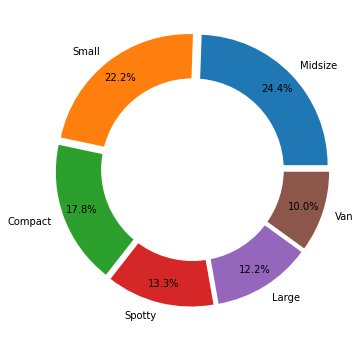

In [108]:
typeCount = df['Type'].value_counts(normalize=True) # df의 타입열 도수를 세되 비율로 저장
fig, ax = plt.subplots(figsize=(6,6))

ax.pie(typeCount,
       explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05),
       labels=['Midsize', 'Small', 'Compact', 'Spotty', 'Large', 'Van'],
       autopct='%1.1f%%', # 소수점표현방법
       pctdistance=0.85
       )

#draw white circle in the middle
centre_circle = plt.Circle((0,0),0.70,fc='white') # matplotlib에서 원을 생성해준다 : 좌표, 크기, 색상
#fig = plt.gcf() # get current figure?
#fig.gca().add_artist(centre_circle) # fig가 가리키는 도표에 artist타입이었던 서클객체 추가?
ax.add_artist(centre_circle)    # 이걸 해도 되고, 위의 두 문장을 넣어도 된다. 얘는 직접 지정해서 그런 것일수도

plt.show()

# Seaborn

Please refer the [official doc](https://seaborn.pydata.org/).

**[TODO]** Plot *boxplot* which comparing the `Price` according to `Type`. The plot must satisify following conditions.
 * nested grouping within additional categorical variable, `Origin`
 * using `Greys` color palette


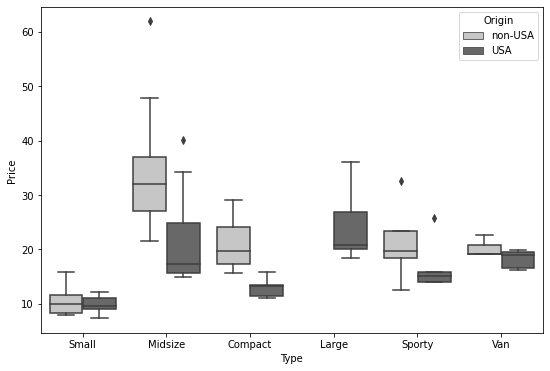

In [12]:
fig, ax = plt.subplots(figsize=(9,6))
sns.boxplot(x=df['Type'], y=df['Price'],
            hue=df['Origin'],
            palette='Greys')
plt.show()

**[TODO]** Plot *pair plot*. The plot must satisify following conditions.
* Target variables are `Price`, `MPG.city`,	`MPG.highway`, `Rev.per.mile`.
* **[Advanced and Optional]** For the non-diagonal plots, add text with pearson's correlation value. (hint, you should add text manually using iteration)

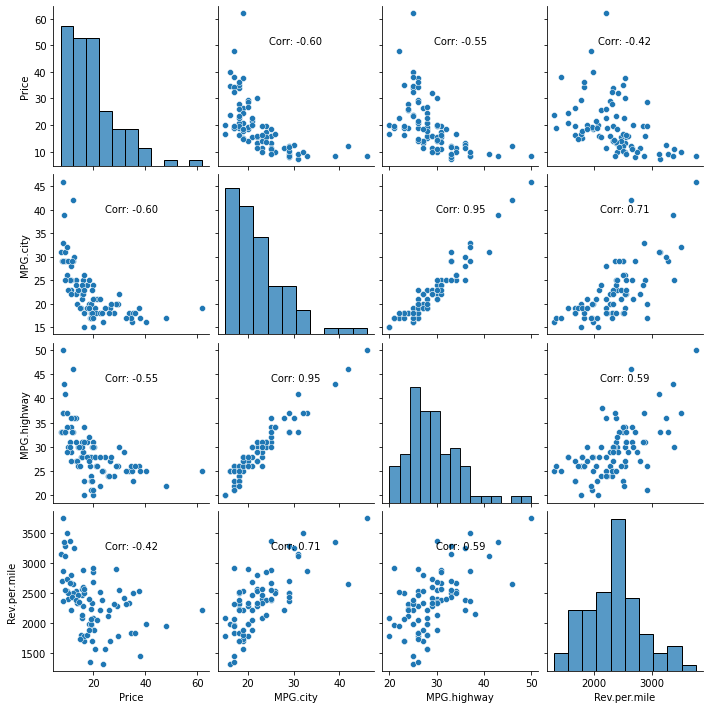

In [105]:
targetVar = ['Price', 'MPG.city', 'MPG.highway', 'Rev.per.mile']             

g = sns.pairplot(df[targetVar])

corrValue = df[targetVar].corr('pearson').to_numpy()
for i, (ax, cv) in enumerate(zip(g.axes.flat, corrValue.flatten())):  
  grid_x = ax.get_xlim()[1] - ax.get_xlim()[0] # x값의 끝-시작값을 이용한 범위
  grid_y = ax.get_ylim()[1] - ax.get_ylim()[0]

  if i % 5 == 0:
    None
  else:
    ax.text( ax.get_xlim()[0] + grid_x * 0.5, ax.get_ylim()[0] + grid_y * 0.75, f'Corr: {cv:.2f}', verticalalignment='bottom',horizontalalignment='center' )

  

plt.show()

# Plotly

**[TODO]** Plot *density contour plot* and deploy the dashboard.
* The *density contour plot* should show relationship between `Price` and user choosen variable among `MPG.city`, `MPG.highway`, `Rev.per.mile`.

(please refer [official doc](https://plotly.com/python/2d-histogram-contour/) about *density contour plot*)


In [7]:
# install packages
!pip install dash
!pip install jupyter_dash

In [109]:
import dash
from dash import html
import plotly.graph_objects as go
from dash import dcc
import plotly.express as px
from dash.dependencies import Input, Output

from jupyter_dash import JupyterDash

# Load Dash App
app = JupyterDash()

# Define App
app.layout = html.Div(id = 'parent',
                      children = [html.H1(id = 'H1', children = 'Cas93 Dashboard',
                                          style = {'textAlign':'center',\
                                                   'marginTop':40,
                                                   'marginBottom':40}),
                                  dcc.Dropdown( id='dropdown',
                                                options=[{'label': 'MPG.city', 'value': 'MPG.city'}, {'label': 'MPG.highway', 'value': 'MPG.highway'}, {'label': 'Rev.per.mile', 'value': 'Rev.per.mile'}],
                                               # options=[{'MPG.city': x, 'MPG.highway': x, 'Rev.per.mile': x} for x in df],
                                               value=None
                                               ),
                                  dcc.Graph(id = 'plot')
                                  ])

# Define callback decorator and it's function    
@app.callback(Output(component_id='plot', component_property= 'figure'),
              [Input(component_id='dropdown', component_property= 'value')])
def graph_update(dropdown_value):
    print(dropdown_value)
    fig = px.density_contour(df, x='Price',y=dropdown_value, marginal_x="histogram", marginal_y="histogram")

    return fig  

if __name__ == '__main__': 
    app.run_server()

Dash app running on:


<IPython.core.display.Javascript object>